In [1]:

import torch
from torch import nn
from torchinfo import summary
from torchvision.utils import make_grid
from torchvision import transforms
import matplotlib.pyplot as plt

from dataset import AppleOrangeData
from generator import Generator
from discriminator import Discriminator

In [2]:
# Testing the dataset 

train_dir = 'apple_orange_data/train'

input_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(256, 256)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

train_data = AppleOrangeData(root_dir=train_dir, transform=input_transform)

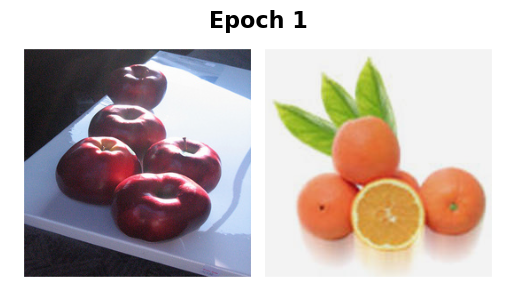

In [3]:

random_idx = torch.randint(0, len(train_data), (1,))
data = train_data[random_idx]
apple = data['Apple'].unsqueeze(dim=0)
orange = data['Orange'].unsqueeze(dim=0)

# plt.subplot(1,2,1)
# plt.imshow(apple.permute(1,2,0))
# plt.title('Apple')
# plt.axis(False);

# plt.subplot(1,2,2)
# plt.imshow(orange.permute(1,2,0))
# plt.title('Orange')
# plt.axis(False);

grid = make_grid(torch.cat([apple, orange], dim=0), nrow=2, normalize=True, padding=16, pad_value=1)
plt.imshow(grid.permute(1,2,0))
plt.title('Epoch 1', fontweight='bold', fontsize=16)
plt.axis(False);

In [4]:
len(train_data)

1019

In [5]:
# Testing the generator

model = Generator(in_channels=3, out_channels=3, num_features=64, num_residuals=9)
summary(model=model,
        input_size=(4,3,256,256),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
Generator (Generator)                              [4, 3, 256, 256]     [4, 3, 256, 256]     --                   True
├─ConvBlock (initial_conv)                         [4, 3, 256, 256]     [4, 64, 256, 256]    --                   True
│    └─Sequential (conv)                           [4, 3, 256, 256]     [4, 64, 256, 256]    --                   True
│    │    └─Conv2d (0)                             [4, 3, 256, 256]     [4, 64, 256, 256]    9,472                True
│    │    └─Identity (1)                           [4, 64, 256, 256]    [4, 64, 256, 256]    --                   --
│    │    └─ReLU (2)                               [4, 64, 256, 256]    [4, 64, 256, 256]    --                   --
├─Sequential (downs)                               [4, 64, 256, 256]    [4, 256, 64, 64]     --                   True
│    └─ConvBlock (0)                           

In [6]:
# Testing the discriminator

model = Discriminator(in_channels=3)
summary(model=model,
        input_size=(4,3,256,256),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
Discriminator (Discriminator)            [4, 3, 256, 256]     [4, 1, 30, 30]       --                   True
├─Sequential (model)                     [4, 3, 256, 256]     [4, 1, 30, 30]       --                   True
│    └─Sequential (0)                    [4, 3, 256, 256]     [4, 64, 128, 128]    --                   True
│    │    └─Conv2d (0)                   [4, 3, 256, 256]     [4, 64, 128, 128]    3,136                True
│    │    └─LeakyReLU (1)                [4, 64, 128, 128]    [4, 64, 128, 128]    --                   --
│    └─Sequential (1)                    [4, 64, 128, 128]    [4, 128, 64, 64]     --                   True
│    │    └─Conv2d (0)                   [4, 64, 128, 128]    [4, 128, 64, 64]     131,200              True
│    │    └─InstanceNorm2d (1)           [4, 128, 64, 64]     [4, 128, 64, 64]     256                  True
│    │    └─Leak